In [1]:
# Importing libraries
import tensorflow as tf
import cv2
import pandas as pd
import os
import numpy as np

In [3]:
# loading classes
classes = os.listdir("./Data/Train")
print(classes)

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [4]:
# loading training image data into an array using openCV
X = []
for c,i in enumerate(classes):
    for j in os.listdir("./Data/Train/"+i):
        img = cv2.imread("./Data/Train/"+i+"/"+j)
        X.append(img)

In [5]:
import matplotlib.pyplot as plt

In [6]:
# loading target training data
Y = []
for i in range(0,len(X)):
    Y.append(i//1700)

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
Y.reshape(-1)

array([ 0,  0,  0, ..., 45, 45, 45])

In [9]:
# shuffling the dataset
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)

In [10]:
X = np.array(X)
Y = np.array(Y)

In [11]:
Y.reshape(-1)

array([35, 40, 26, ..., 14,  1, 11])

Text(0.5, 0, 'character_34_chhya')

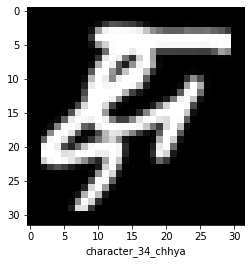

In [12]:
# visualizing the dataset
no = 2
plt.imshow(X[no])
plt.xlabel(classes[Y[no]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# train-test split
train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.05, random_state=0)

In [15]:
train_y.reshape(-1)
val_y.reshape(-1)

array([35,  2,  0, ..., 33, 13, 15])

In [2]:
# 46 total classes
NUM_CLASSES = 46

In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", update_freq='batch')
# tensorboard --logdir="E:\Amish\CnA Hackathon\logs"

In [3]:
# importing ResNet34 model architecture
from ResNet import ResNet34
model_res = ResNet34(NUM_CLASSES)

In [19]:
# defining Early Stopping callback to stop traing when the val_accuracy becomes greater than a certain value
class EarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, monitor='val_accuracy', value=0.995, verbose=0):
        super(tf.keras.callbacks.Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
       
        if current > self.value:
            print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [20]:
# compiling the model
model_res.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  metrics=[tf.keras.metrics.CategoricalAccuracy(), 'accuracy'])
# training the model for 10 epochs
model_res.fit(train_x, train_y, epochs=10,
          callbacks=[tensorboard_callback,EarlyStopping()],
          validation_data=(val_x, val_y))

Epoch 1/10
2322/2322 [==============================] - 277s 117ms/step - loss: 0.7027 - categorical_accuracy: 0.0223 - accuracy: 0.8011 - val_loss: 0.4179 - val_categorical_accuracy: 0.0174 - val_accuracy: 0.8967
Epoch 2/10
2322/2322 [==============================] - 290s 125ms/step - loss: 0.1064 - categorical_accuracy: 0.0209 - accuracy: 0.9678 - val_loss: 0.1268 - val_categorical_accuracy: 0.0251 - val_accuracy: 0.9611
Epoch 3/10
2322/2322 [==============================] - 266s 115ms/step - loss: 0.0703 - categorical_accuracy: 0.0209 - accuracy: 0.9792 - val_loss: 0.0935 - val_categorical_accuracy: 0.0256 - val_accuracy: 0.9772
Epoch 4/10
2322/2322 [==============================] - 325s 140ms/step - loss: 0.0524 - categorical_accuracy: 0.0215 - accuracy: 0.9847 - val_loss: 0.0615 - val_categorical_accuracy: 0.0274 - val_accuracy: 0.9831
Epoch 5/10
2322/2322 [==============================] - 337s 145ms/step - loss: 0.0387 - categorical_accuracy: 0.0214 - accuracy: 0.9880 - val_l

In [23]:
# Evaluting on the validation dataset
model_res.evaluate(val_x, val_y)

123/123 [==============================] - 4s 30ms/step - loss: 0.0360 - categorical_accuracy: 0.0256 - accuracy: 0.9905


[0.03604639694094658, 0.02557544782757759, 0.9905371069908142]

In [24]:
model_res.save("resnet_model")

INFO:tensorflow:Assets written to: resnet_model\assets


In [25]:
# loading the test images
X_test = []
for dirs in os.listdir("./Data/Test"):
    X_test.append(cv2.imread("./Data/Test/"+ dirs))
X_test = np.array(X_test)

In [26]:
# getting predictions
ypred = model_res.predict(X_test)
# storing the predictions after converting then into class names
y_pred = []
for i in range(len(X_test)):
    y_pred.append(np.argmax(ypred[i]))
sub = [] 
i = 0
for dirs in os.listdir("./Data/Test"):
    sub.append((dirs, classes[y_pred[i]]))
    i+=1

In [27]:
# saving the predictions in csv file
submission = pd.DataFrame(sub)
submission = submission.rename(columns = {1:"Category", 0:"Id"})
submission.set_index('Id', inplace=True)
submission.to_csv("submission.csv")